### Import the necessary package

In [16]:
import sys
sys.path.insert(0, '../')

import os
import numpy as np
import pandas as pd
import utilities as utils
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
from skimage.measure import label, regionprops
from dotenv import load_dotenv

load_dotenv()

True

### Global variables

In [2]:
# store the path
path_full = os.environ.get("ORI_PATH")
path_mask = os.path.join(path_full, "datasets", "cleaned", "mask_image")
path_data = os.path.join(path_full, "data")

### Get the mask image list and information

In [3]:
# get the list of mask images
mask_images = os.listdir(path_mask)
cdr_data = pd.DataFrame(data=mask_images, columns=["id"])

# extract the information from the file name
cdr_data["path"] = cdr_data["id"].apply(lambda x: os.path.join(path_mask, x))
cdr_data["id"] = cdr_data["id"].apply(lambda x: x.split(".")[0])
cdr_data["label"] = cdr_data["id"].apply(lambda x: x.split("_")[1])
cdr_data["eye_side"] = cdr_data["id"].apply(lambda x: x.split("_")[3])

cdr_data.head(5)

,id,path,label,eye_side
0,fff_0_111784_l_y_mask,D:\Programming\Python\Research Prof. Anindita\...,0,l
1,fff_0_111784_r_y_mask,D:\Programming\Python\Research Prof. Anindita\...,0,r
2,fff_0_113060_l_1_mask,D:\Programming\Python\Research Prof. Anindita\...,0,l
3,fff_0_113060_l_2_mask,D:\Programming\Python\Research Prof. Anindita\...,0,l
4,fff_0_113060_l_3_mask,D:\Programming\Python\Research Prof. Anindita\...,0,l


### Visualize the mask image

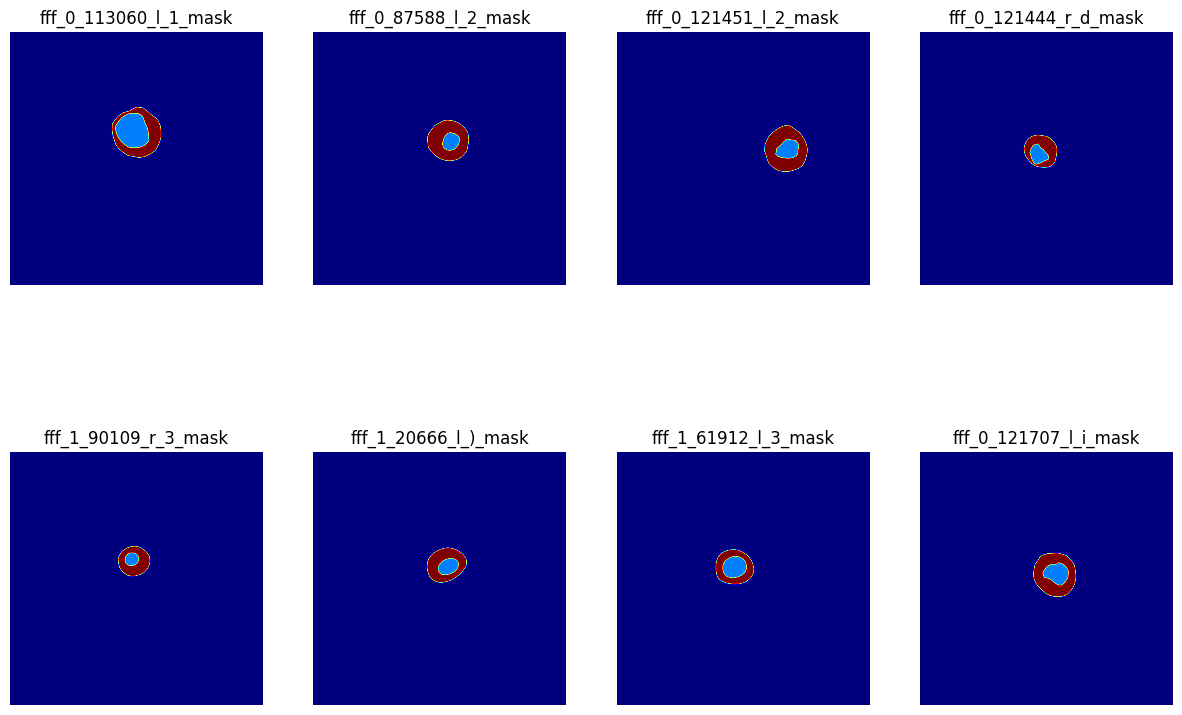

In [4]:
# configure the visualizations
plt.figure(figsize=(15, 10))
fig_rows = 2
fig_cols = 4
# plot the images
for i in range(fig_rows * fig_cols):
    # get a random mask image
    choice = randint(0, len(cdr_data))
    # plot the mask image
    plt.subplot(fig_rows,fig_cols, i+1)
    plt.imshow(plt.imread(cdr_data["path"][choice]), cmap='jet')
    plt.title(cdr_data["id"][choice])
    plt.axis('off')

### Experiment

In [5]:
mask_sample = cdr_data.sample(1)
mask_sample

,id,path,label,eye_side
233,fff_1_20666_l_)_mask,D:\Programming\Python\Research Prof. Anindita\...,1,l


In [6]:
mask = tf.io.read_file(mask_sample["path"].values[0])
mask = tf.image.decode_png(mask, channels=1)
mask = tf.image.resize(mask, [512, 512], method='nearest')
mask = tf.cast(mask, tf.int32)

shape: (512, 512, 1)
unique value: [  0  64 255]


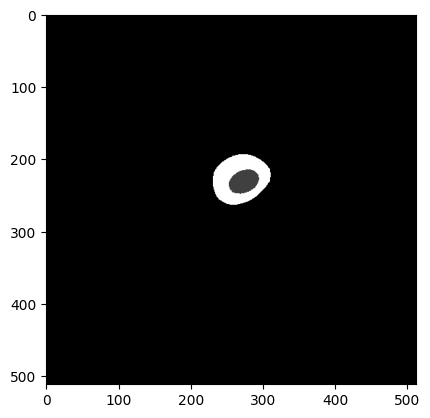

In [10]:
print(
    f"shape: {mask.shape}",
    f"unique value: {np.unique(mask)}",
    sep="\n"
    )
plt.imshow(mask, cmap='gray')
plt.show()

In [37]:
cup_mask = mask[:,:,0] == 64
disc_mask = mask[:,:,0] == 255

In [38]:
mask[:,:,0].shape

TensorShape([512, 512])

In [39]:
cup_props = regionprops(label(cup_mask))
disc_props = regionprops(label(disc_mask))

In [ ]:
cup_bbox = cup_props[0].bbox
disc_bbox = disc_props[0].bbox
print(cup_bbox, disc_bbox)
# (min_row, min_col, max_row, max_col)

(215, 253, 249, 295) (194, 231, 264, 311)


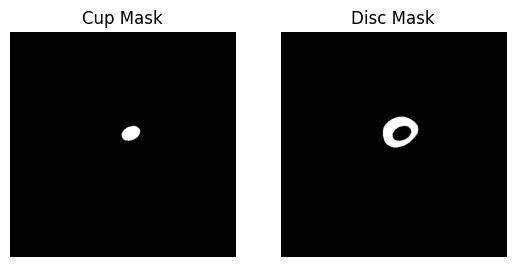

In [41]:
plt.subplot(1,2, 1)
plt.imshow(cup_mask, cmap='gray')
plt.title("Cup Mask")
plt.axis('off')

plt.subplot(1,2, 2)
plt.imshow(disc_mask, cmap='gray')
plt.title("Disc Mask")
plt.axis('off')

plt.show()

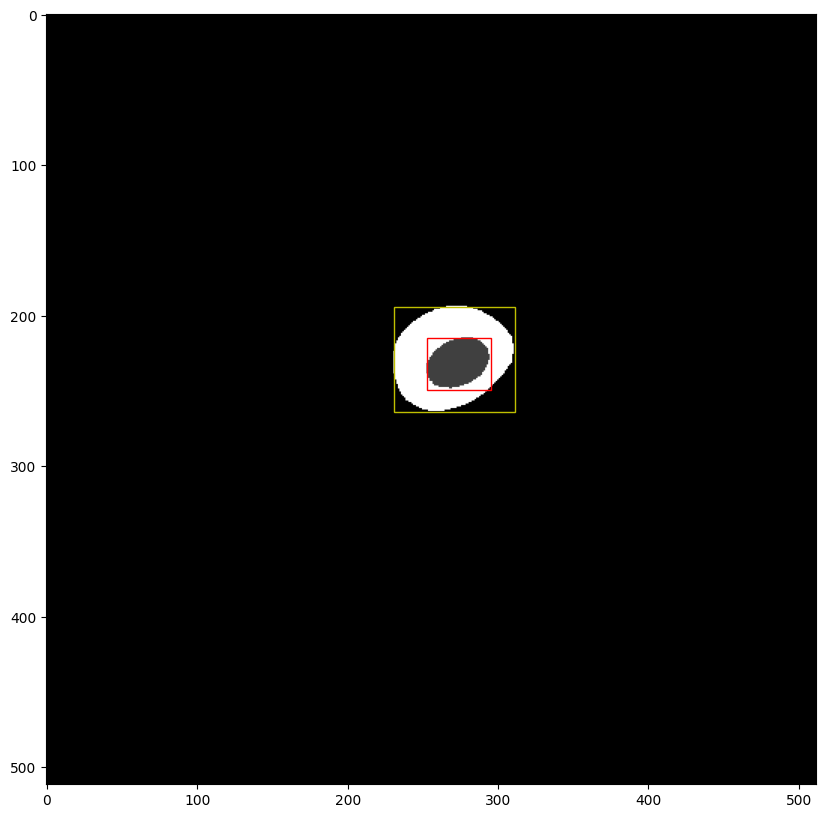

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.imshow(mask[:, :, 0], cmap='gray')

ax.add_patch(plt.Rectangle((cup_bbox[1], cup_bbox[0]),          # anchor point (x, y)
                            cup_bbox[3] - cup_bbox[1],          # width
                            cup_bbox[2] - cup_bbox[0],          # height
                            edgecolor='r', facecolor='none'))
ax.add_patch(plt.Rectangle((disc_bbox[1], disc_bbox[0]),        # anchor point (x, y)
                            disc_bbox[3] - disc_bbox[1],        # width
                            disc_bbox[2] - disc_bbox[0],        # height
                            edgecolor='y', facecolor='none'))

plt.show()

In [44]:
# calculate the area CDR
a_cdr = np.sum(cup_mask) / np.sum(disc_mask)
# calculate the vertical CDR
cup_width = cup_bbox[3] - cup_bbox[1]
disc_width = disc_bbox[3] - disc_bbox[1]
v_cdr = cup_width / disc_width
# calculate the horizontal CDR
cup_height = cup_bbox[2] - cup_bbox[0]
disc_height = disc_bbox[2] - disc_bbox[0]
h_cdr = cup_height / disc_height

print(f"Area CDR: {a_cdr}",
        f"Vertical CDR: {v_cdr}",
        f"Horizontal CDR: {h_cdr}",
        sep="\n"
        )

Area CDR: 0.3310409502969678
Vertical CDR: 0.525
Horizontal CDR: 0.4857142857142857
